In [1]:
#importing sql library (sqlite3)
import sqlite3
db=sqlite3.connect(r'C:\Users\Shubh Gaur\Desktop\Coding Ninjas Data Science\18. Indexing and SQLite\IMDB.sqlite')#connect to a database by providing the path
db

In [2]:
#If we establish a connection to a database which does not exist then also
#connect fxn returns a connection object and does not give any error.

db=sqlite3.connect("IMDB_1.sqlite")#if file exists establishes connection,if not,
db                         #makes a file and establishes connection with it.

In [3]:
db=sqlite3.connect('School.sqlite')
db

In [4]:
#create a cursor object which we will use to run queries on our database
cur=db.cursor()
cur

In [5]:
#Running query for creating table
#instead of varchar we need to specify text for a string in sqlite
sql_query='create table student (RollNumber int Primary Key,name Text,age int)'
cur.execute(sql_query)

In [6]:
cur.execute('Insert into student values(101,"Aman",20)')

In [7]:
'''We have done the changes to our table but still we cannot see those
changes using the DB Browser,therefore we need to use a command db.commit()
for commiting changes to our table so that the changes are reflected in the database.'''
db.commit()

In [8]:
cur.execute('Insert into student values(101,"Aman",20)')#error because 101 is already present as a roll number so we cannot
                                                        #insert it again as rollnumber column is a primary key column and cannot
                                                        #contain redundant values.

IntegrityError: UNIQUE constraint failed: student.RollNumber

In [9]:
cur.execute('Insert into student values(102,"Akhil",20)')#no error
db.commit()


In [10]:
#closing database file after performing the operations
db.close()

In [11]:
cur.execute('Insert into student values(102,"Akhil",20)')#error as database is closed

ProgrammingError: Cannot operate on a closed database.

### Problem 1: Create a table employee with given values in the Employee Database

In [13]:
import sqlite3
db=sqlite3.connect('Employees.sqlite')
cur=db.cursor()#cursor object to run queries
#create table query
sql_query='create table Employee_detail (employee_id int Primary Key,name Text,age int,department text,salary int)'
cur.execute(sql_query)

In [14]:
cur.execute('Insert into employee_detail values(100,"Rishav",25,"Marketing",50000)')
cur.execute('Insert into employee_detail values(101,"Abhishek",26,"Operations",60000)')
cur.execute('Insert into employee_detail values(102,"Aman",24,"Human Resource",75000)')
db.commit()
db.close()

# --------------------------------------------------------------------------------------------------------------

## PASSING PARAMETERS TO QUERIES

In [1]:
import sqlite3

In [2]:
db=sqlite3.connect('School.sqlite')

In [3]:
cur=db.cursor()

In [4]:
cur.execute('Insert into student values(103,"Mohit",24)')

In [5]:
db.commit()

In [6]:
#now suppose i have some parameters and, i want to pass them into the queries so lets see how we can do that
rollnumber=104
name='Nikhil'
age=34

cur.execute('Insert into student values(?,?,?)',(rollnumber,name,age))# ? symbol works as a placeholder for the passed parameters


In [7]:
db.commit()

In [8]:
#we can execute various queries at a time if we want. For better understanding see the example below:

#Suppose we want to insert more than one row at a time so what we can do is create a list of tuples where each tuple represents
#data of each row that we want to insert and call execute many fxn in the way shown below
#execute many will take each tuple at a time and execute the query one by one on the data present in that tuple.


data=[(105,"Nidhi",20),(106,"Manisha",21),(107,"Ankush",22)]
cur.executemany('Insert into student values(?,?,?)',data)

In [9]:
db.commit()

In [10]:
#update value of age column to 30 for every row
cur.execute('update student set age = 30')

In [11]:
db.commit()

In [13]:
cur.execute('update student set age = 25 where rollnumber=103')
db.commit()

In [15]:
cur.execute('update student set age = ? where rollnumber=103',(12))# (12) is not a tuple thats why the error
db.commit()

ValueError: parameters are of unsupported type

In [18]:
type((10))#we would think that the answer would be tuple but it will be int

int

In [19]:
#if we want to make a tuple like this we need to add a comma after the variable with which we are making the tuple
type((10,))#now class it will be a tuple

tuple

In [20]:
cur.execute('update student set age = ? where rollnumber=103',(12,))# executes perfectly
db.commit()

### Question:remove the employee with employee id 101 in employee database without using parameter.

In [22]:
db=sqlite3.connect('Employees.sqlite')

In [23]:
cur=db.cursor()

In [24]:
cur.execute('delete from employee_detail where employee_id=101')
db.commit()

### Question:remove the employee with employee id 102 in employee database using parameter.

In [25]:
db=sqlite3.connect('Employees.sqlite')

In [26]:
cur=db.cursor()

In [27]:
emp_id=102
cur.execute('delete from employee_detail where employee_id=?',(emp_id,))
db.commit()

### Question:A given data of 12 Employees working in an investment firm. So add the Employee Data in Employee SQLite Database of Employee_Detail Table which was created by you.

In [30]:
data=[(101,"Aadarsh",25,"Marketing",50000),
      (102,"Aarti",27,"Operations",60000),
      (103,"Siddharth",25,"Finance",85000),
      (104,"Aman",24,"Human Resource",75000),
      (105,"Amit",30,"Marketing",50000),
      (106,"Shivansh",26,"IT",90000),
     (107,"Vaibhav",23,"Finance",85000),
     (108,"Himanshu",26,"IT",90000),
     (109,"Raman",25,"Operations",60000),
     (110,"Kunal",26,"Marketing",50000),
     (111,"Adhira",29,"Human Resource",75000),
     (112,"Tanya",24,"Marketing",50000)]
cur.executemany('insert into employee_detail values(?,?,?,?,?)',data)
db.commit()

In [32]:
db.close()

## Fetch Data from database

In [31]:
import sqlite3

In [33]:
db=sqlite3.connect('School.sqlite')

In [34]:
cur=db.cursor()

In [35]:
cur.execute('select * from student')

In [36]:
#now we can iterate over this cursor object and we will get value of each row combined in the form of a tuple
#and each tuple represents one row
for row in cur:
    print(row)

(101, 'Aman', 30)
(102, 'Akhil', 30)
(103, 'Mohit', 12)
(104, 'Nikhil', 30)
(105, 'Nidhi', 30)
(106, 'Manisha', 30)
(107, 'Ankush', 30)


In [37]:
#Some more methods to fetch data

In [38]:
cur.execute('select * from student')#fetching all the rows into cursor object
print(cur.fetchone())#fetches one row and then the next if called another time
print(cur.fetchone())

(101, 'Aman', 30)
(102, 'Akhil', 30)


In [39]:
print(cur.fetchone())

(103, 'Mohit', 12)


In [43]:
cur.execute('select * from student')#fetching all the rows into cursor object
print(cur.fetchmany(3))#fetches n number of rows,here n=3
print(cur.fetchmany(3))
print(cur.fetchmany(3))
print(cur.fetchmany(3))#we will get an empty list as all rows have been fetched

[(101, 'Aman', 30), (102, 'Akhil', 30), (103, 'Mohit', 12)]
[(104, 'Nikhil', 30), (105, 'Nidhi', 30), (106, 'Manisha', 30)]
[(107, 'Ankush', 30)]
[]


In [44]:
cur.execute('select * from student')#fetching all the rows into cursor object
print(cur.fetchmany())#if we dont pass any value to fetchmany it will behave just like fetch one and fetch one value by default

[(101, 'Aman', 30)]


In [45]:
cur.execute('select * from student')#fetching all the rows into cursor object
print(cur.fetchall())#we will get each and every row from the database

[(101, 'Aman', 30), (102, 'Akhil', 30), (103, 'Mohit', 12), (104, 'Nikhil', 30), (105, 'Nidhi', 30), (106, 'Manisha', 30), (107, 'Ankush', 30)]


In [46]:
#apllying filter
cur.execute('select * from student where rollnumber>102')#fetching all the rows into cursor object  which satisfy the condition
print(cur.fetchmany(3))#fetches n number of rows,here n=3

[(103, 'Mohit', 12), (104, 'Nikhil', 30), (105, 'Nidhi', 30)]


In [49]:
#apllying filter
cur.execute('select * from student where name like "A%"')#fetching all the rows into cursor object  which satisfy the condition
print(cur.fetchall())
db.close()

[(101, 'Aman', 30), (102, 'Akhil', 30), (107, 'Ankush', 30)]


### Question:print employee id of employees working in finance department.

In [57]:
import sqlite3
db=sqlite3.connect('Employees.sqlite')
cur=db.cursor()
cur.execute('select employee_id from employee_detail where department="Finance"')
for i in cur:
    print(i)#whether we select only one column from the table or the entire table the row values would always come in the form of
    #tuple
for i in cur:
    print(i[0])#values are not printing again as we have already traversed over the cursor object so the cursor pointer has
    #surpassed the final row of the table that we fetched from the query 

(103,)
(107,)


In [58]:
#correct solution
import sqlite3
db=sqlite3.connect('Employees.sqlite')
cur=db.cursor()
cur.execute('select employee_id from employee_detail where department="Finance"')
for i in cur:
    print(i[0])#whether we select only one column from the table or the entire table the row values would always come in the form of
    #tuple


103
107


### Question:find the number of employee working in different departments from the table

In [61]:
import sqlite3
db=sqlite3.connect('Employees.sqlite')
cur=db.cursor()
cur.execute('select department,count(*) from employee_detail group by department')
for i in cur:
    for j in i:
        print(j,end=' ')
    print()
        

Finance 2 
Human Resource 2 
IT 2 
Marketing 5 
Operations 2 


## SQLite with Pandas

In [1]:
import sqlite3
import pandas as pd

In [63]:
db=sqlite3.connect('School.sqlite')

In [65]:
#read_sql_query fxn ogf pandas library allows us to fetch data using query on the connection object.
#Example
pd.read_sql_query('select * from student',db)#db is the connection object
#we get a data frame as the output

,RollNumber,name,age
0,101,Aman,30
1,102,Akhil,30
2,103,Mohit,12
3,104,Nikhil,30
4,105,Nidhi,30
5,106,Manisha,30
6,107,Ankush,30


In [68]:
data=pd.read_sql_query('select * from student',db)
data.head()

,RollNumber,name,age
0,101,Aman,30
1,102,Akhil,30
2,103,Mohit,12
3,104,Nikhil,30
4,105,Nidhi,30


In [71]:
data[data['age']==30]

,RollNumber,name,age
0,101,Aman,30
1,102,Akhil,30
3,104,Nikhil,30
4,105,Nidhi,30
5,106,Manisha,30
6,107,Ankush,30


In [ ]:
'''Using a dataframe is easy therefore it is always advisable to use this method whenever we want to perform operations on the
data present in a database.'''

In [74]:
#we can create new tables also with the help of pandas library in the database.
#Lets create a table faculty with attribute id,name ,course,salary

In [75]:
#Steps:-
#first create a pandas datafradme
faculty=pd.DataFrame({'ID':[201,202,203],'Name':['Aman','Komal','Mahesh'],'Course':['English','Maths','Science'],
                      'Salary':[20000,22000,23000]})

In [76]:
faculty.head()

,ID,Name,Course,Salary
0,201,Aman,English,20000
1,202,Komal,Maths,22000
2,203,Mahesh,Science,23000


In [77]:
#we can make a table using this dataframe using to_sql fxn which takes in two parameters,table name and database connection 
#object
faculty.to_sql("Faculties",db)

In [86]:
data=pd.read_sql_query('select * from student',db)
data.head()

,RollNumber,name,age
0,101,Aman,30
1,102,Akhil,30
2,103,Mohit,12
3,104,Nikhil,30
4,105,Nidhi,30


In [87]:
#Now we want to insert a new column to student table we can also do that using dataframes
data['Address']='test'
data.head()

,RollNumber,name,age,Address
0,101,Aman,30,test
1,102,Akhil,30,test
2,103,Mohit,12,test
3,104,Nikhil,30,test
4,105,Nidhi,30,test


In [92]:
#now making changes to student table using to_sql function
data.to_sql('student',db,if_exists='replace')# if_exists='replace' tells us that if there is a table with name student
                                            #then replace that table with the dataframe.
#note:table name inside the fxn is case sensitive

In [93]:
db.close()

### Question: Find count of each Genre present in Imdb Movie Dataset

In [1]:
import sqlite3
import pandas as pd

In [2]:
db=sqlite3.connect('IMDB.sqlite')

In [3]:
data=pd.read_sql_query('Select genre,count(*) from genre group by genre having genre!="";',db)

In [4]:
data.head()

,genre,count(*)
0,Action,33
1,Adventure,43
2,Animation,13
3,Biography,21
4,Comedy,31


In [5]:
#ANS
for i in range(len(data)):
    print(data.iloc[i,0],data.iloc[i,1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


### Question: Find the highest grossing movie.

In [6]:
data=pd.read_sql_query('select * from earning',db)

In [7]:
data['TotalEarning']=data['Domestic']+data['Worldwide']

In [8]:
#ANS
maxEarning=data.TotalEarning.max()
movieid=data[data.TotalEarning==maxEarning].iloc[0,0]
print(movieid)

38626


In [9]:
#ans
ans_df=pd.read_sql_query('select Rating from IMDB where movie_id='+str(movieid),db,)
print(ans_df.iloc[0,0])

8.1


## ASSIGNMENT

In [45]:
import sqlite3
import pandas as pd

In [46]:
db=sqlite3.connect('IMDB.sqlite')

In [4]:
#reading tables
imdb=pd.read_sql_query('select * from imdb',db)
genre=pd.read_sql_query('select * from genre',db)
earning=pd.read_sql_query('select * from earning',db)

In [14]:
imdb.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [15]:
genre.head()

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [16]:
earning.head()

,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0
1,30114,18335230,60738797.0
2,37367,35014192,39187783.0
3,49473,15322921,87100449.0
4,14867,6739492,19839492.0


In [23]:
#ASS1: Find most voted movie's name and rating
maxVotes=imdb.TotalVotes.max()
movieRecord=(imdb[imdb.TotalVotes==maxVotes])
print(movieRecord.iloc[0,1],movieRecord.iloc[0,2])

Inception (2010) 8.8


In [39]:
#ASS2:Find the movie with longest running time
def replacemin(s):#for replacing min in running time
    if s!='':
        out=s.split()
        return int(out[0])
    else:
        return 0

test=imdb.copy()
test.Runtime=test.Runtime.apply(replacemin)

In [32]:
test.dtypes

Movie_id         object
Title            object
Rating          float64
TotalVotes        int64
MetaCritic       object
Budget           object
Runtime           int64
CVotes10         object
CVotes09         object
CVotes08         object
CVotes07         object
CVotes06         object
CVotes05         object
CVotes04         object
CVotes03         object
CVotes02         object
CVotes01         object
CVotesMale       object
CVotesFemale     object
CVotesU18        object
CVotesU18M       object
CVotesU18F       object
CVotes1829       object
CVotes1829M      object
CVotes1829F      object
CVotes3044       object
CVotes3044M      object
CVotes3044F      object
CVotes45A        object
CVotes45AM       object
CVotes45AF       object
CVotes1000       object
CVotesUS         object
CVotesnUS        object
VotesM           object
VotesF           object
VotesU18         object
VotesU18M        object
VotesU18F        object
Votes1829        object
Votes1829M       object
Votes1829F      

In [40]:
#ANS
runTimeMax=test.Runtime.max()
ans_df=test[test.Runtime==runTimeMax]
print(ans_df.iloc[0,1],ans_df.iloc[0,6])

The Wolf of Wall Street (2013) 180


In [85]:
#ASS3:Find the movie which has maximum net profit.
#Note:-NetProfit=Total Earning(Domestic+International)- budget
test1=pd.read_sql_query('''select imdb.Title,earning.domestic,earning.worldwide,imdb.budget from imdb join earning on 
                        imdb.movie_id=earning.movie_id''',db)
test1.head()

,Title,Domestic,Worldwide,Budget
0,12 Years a Slave (2013),56671993,187733202.0,20000000.0
1,127 Hours (2010),18335230,60738797.0,18000000.0
2,50/50 (2011),35014192,39187783.0,8000000.0
3,About Time (2013),15322921,87100449.0,12000000.0
4,Amour (2012),6739492,19839492.0,8900000.0


In [86]:
#Changing budget to 0 wherever "" is present
test1.loc[test1.Budget=='','Budget']=0
test1.loc[test1.Domestic=='','Domestic']=0
test1.loc[test1.Worldwide=='','Worldwide']=0
#changing Budget values to float
def convertFloat(n):
    return float(n)
test1.Budget=test1.Budget.apply(convertFloat)

In [87]:
test1['Net Profit']=test1.Domestic+test1.Worldwide-test1.Budget

In [88]:
#ANS
maxNetProfit=test1['Net Profit'].max()
test1[test1['Net Profit']==maxNetProfit]
print(test1.iloc[0,0])

12 Years a Slave (2013)


In [36]:
#ASS-4:Find the least budgeted movie and if there are more 
#than one movie of the same budget,print the one which has maximum profit
import sqlite3
import pandas as pd

db=sqlite3.connect('IMDB.sqlite')

test1=pd.read_sql_query('''select imdb.Title,earning.domestic,earning.worldwide,imdb.budget from imdb join earning on 
                        imdb.movie_id=earning.movie_id''',db)

In [37]:
#Dropping rows where budget,and changing to 0 in domestic and worldwide whereever "" is present
test1.drop(test1[test1.Budget==""].index,inplace=True)
test1.loc[test1.Domestic=='','Domestic']=0
test1.loc[test1.Worldwide=='','Worldwide']=0
def convertFloat(n):
    return float(n)
test1.Budget=test1.Budget.apply(convertFloat)

In [38]:
test1.head()

,Title,Domestic,Worldwide,Budget
0,12 Years a Slave (2013),56671993,187733202.0,20000000.0
1,127 Hours (2010),18335230,60738797.0,18000000.0
2,50/50 (2011),35014192,39187783.0,8000000.0
3,About Time (2013),15322921,87100449.0,12000000.0
4,Amour (2012),6739492,19839492.0,8900000.0


In [39]:
minBudget=test1.Budget.min()
ans_df=test1[test1.Budget==minBudget].copy()#making a copy to avoid settings with copy warning
ans_df.head()

,Title,Domestic,Worldwide,Budget
71,Short Term 12 (2013),1013100,1013100.0,1000000.0
109,Tyrannosaur (2011),22321,22321.0,1000000.0


In [40]:
ans_df['netprofit']=ans_df['Domestic']+ans_df['Worldwide']-ans_df['Budget']
ans_df.sort_values(by='netprofit',ascending=False,inplace=True)
ans_df.reset_index(drop=True,inplace=True)

In [42]:
#ANS
print(ans_df.Title[0])

Short Term 12 (2013)


In [131]:
#ASS-5:-Find the highest grossing movie year wise
db=sqlite3.connect('IMDB.sqlite')
df=pd.read_sql_query('select imdb.title,earning.Domestic,earning.Worldwide from imdb join earning on imdb.movie_id=earning.movie_id',db)

In [132]:
df['TotalEarning']=df.Domestic+df.Worldwide

In [133]:
df.head()

,Title,Domestic,Worldwide,TotalEarning
0,12 Years a Slave (2013),56671993,187733202.0,244405195.0
1,127 Hours (2010),18335230,60738797.0,79074027.0
2,50/50 (2011),35014192,39187783.0,74201975.0
3,About Time (2013),15322921,87100449.0,102423370.0
4,Amour (2012),6739492,19839492.0,26578984.0


In [134]:
def extractYearFromTitle(s):
    year=s[-5:-1]
    return int(year)
df['Year']=df.Title.apply(extractYearFromTitle)

In [135]:
df.head()

,Title,Domestic,Worldwide,TotalEarning,Year
0,12 Years a Slave (2013),56671993,187733202.0,244405195.0,2013
1,127 Hours (2010),18335230,60738797.0,79074027.0,2010
2,50/50 (2011),35014192,39187783.0,74201975.0,2011
3,About Time (2013),15322921,87100449.0,102423370.0,2013
4,Amour (2012),6739492,19839492.0,26578984.0,2012


In [136]:
def removeYearFromTitle(s):
    return (s.split('(')[0]).replace(u'\xa0',u'')#replacing \xa0 from empty string""
df.Title=df.Title.apply(removeYearFromTitle)

In [144]:
def YearWiseHighestGrossing(moviename,year,TotalEarning):
    n=len(year)
    d={}
    for i in range(n):
        if year[i] not in d:
            d[year[i]]=[moviename[i],TotalEarning[i]]
        else:
            #check if the current movie that is present has less TotalEarning than the one that has just come
            if d[year[i]][1]<TotalEarning[i]:
                d[year[i]][0]=moviename[i]
                d[year[i]][1]=TotalEarning[i]
    ans_d={}
    for i in d:
        ans_d[i]=d[i][0]
    
    #creating a resultant dataframe
    res_df=pd.DataFrame(list(ans_d.items()))
    res_df.columns=['Year','Title']
    res_df.sort_values(by='Year',ascending=True,inplace=True)
    res_df.reset_index(drop=True,inplace=True)
    return res_df


ans_df=YearWiseHighestGrossing(df.Title,df.Year,df.TotalEarning)

In [145]:
ans_df

,Year,Title
0,2010,Toy Story 3
1,2011,Rise of the Planet of the Apes
2,2012,The Avengers
3,2013,The Hunger Games: Catching Fire
4,2014,Guardians of the Galaxy
5,2015,Star Wars: The Force Awakens
6,2016,Rogue One


In [146]:
for i in range(len(ans_df)):
    print(ans_df.iloc[i,0],ans_df.iloc[i,1])

2010 Toy Story 3
2011 Rise of the Planet of the Apes
2012 The Avengers
2013 The Hunger Games: Catching Fire
2014 Guardians of the Galaxy
2015 Star Wars: The Force Awakens
2016 Rogue One


In [10]:
#ASS-6:Find out percentage of budget for each genre
db=sqlite3.connect('IMDB.sqlite')
df=pd.read_sql_query('''select imdb.movie_id,imdb.budget,genre.genre from imdb 
                        join genre on imdb.movie_id=genre.movie_id where imdb.budget is not null and 
                        genre.genre is not null''',db)

In [11]:
df.drop(df[(df.Budget=="") | (df.genre=="")].index,inplace=True)

In [12]:
def FindTotalBudgetByGenre(Budget,Genre):
    n=len(Budget)
    d={}
    for i in range(n):
        d[Genre[i]]=d.get(Genre[i],0)+Budget[i]
    
    ans_df=pd.DataFrame(list(d.items()))
    ans_df.columns=['Genre','BudgetAlloted']
    s=ans_df.BudgetAlloted.sum()#sum of total Budget
    ans_df['PercentageOfBudgetAllotted']=(ans_df['BudgetAlloted']/s)*100
    return ans_df
    
ans_df=FindTotalBudgetByGenre(list(df.Budget),list(df.genre))

In [13]:
ans_df

,Genre,BudgetAlloted,PercentageOfBudgetAllotted
0,Biography,6.245000e+08,2.591910
1,Drama,2.614400e+09,10.850744
2,History,1.730000e+08,0.718015
3,Adventure,6.046700e+09,25.096081
4,Comedy,1.740100e+09,7.222070
5,Romance,2.709000e+08,1.124337
6,Fantasy,1.094000e+09,4.540512
7,Action,4.332500e+09,17.981506
8,Mystery,4.690000e+08,1.946527
9,Sci-Fi,2.596000e+09,10.774377


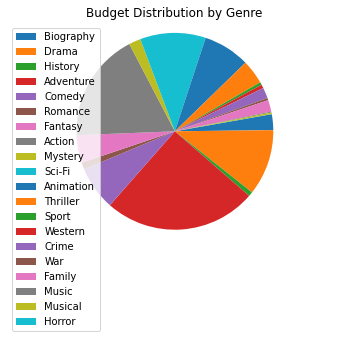

In [70]:
#plotting a pie chart
import matplotlib.pyplot as plt
patches,texts=plt.pie(ans_df.BudgetAlloted,counterclock=False,startangle=10,radius=1.5)
plt.title('Budget Distribution by Genre')
plt.legend(patches,ans_df.Genre,loc='best')
plt.axis('equal')
plt.show()

In [42]:
#ASS:7:Find out the percentage of earning for each Genre and plot the pie chart
import sqlite3
import pandas as pd
db=sqlite3.connect("IMDB.sqlite")

In [43]:
earning.head()

,Movie_id,Domestic,Worldwide
0,36809,56671993,187733202.0
1,30114,18335230,60738797.0
2,37367,35014192,39187783.0
3,49473,15322921,87100449.0
4,14867,6739492,19839492.0


In [44]:
genre.head()

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [45]:
df=pd.read_sql_query('''select genre.genre,earning.Domestic,earning.Worldwide from earning join genre on 
                        earning.movie_id=genre.movie_id where genre.genre is not null and genre.genre!=""''',db)
df

,genre,Domestic,Worldwide
0,Biography,56671993,1.877332e+08
1,Adventure,18335230,6.073880e+07
2,Comedy,35014192,3.918778e+07
3,Comedy,15322921,8.710045e+07
4,Drama,6739492,1.983949e+07
...,...,...,...
305,Sport,13657115,2.305712e+07
306,Comedy,189422889,4.712229e+08
307,Sci-Fi,233921534,7.478628e+08
308,Sci-Fi,146408305,3.536241e+08


In [46]:
df['TotalEarning']=df.Domestic+df.Worldwide

In [47]:
df

,genre,Domestic,Worldwide,TotalEarning
0,Biography,56671993,1.877332e+08,2.444052e+08
1,Adventure,18335230,6.073880e+07,7.907403e+07
2,Comedy,35014192,3.918778e+07,7.420198e+07
3,Comedy,15322921,8.710045e+07,1.024234e+08
4,Drama,6739492,1.983949e+07,2.657898e+07
...,...,...,...,...
305,Sport,13657115,2.305712e+07,3.671423e+07
306,Comedy,189422889,4.712229e+08,6.606458e+08
307,Sci-Fi,233921534,7.478628e+08,9.817843e+08
308,Sci-Fi,146408305,3.536241e+08,5.000324e+08


In [48]:
def GenreEarning(genre,earning):
    n=len(genre)
    d={}
    for i in range(n):
        d[genre[i]]=d.get(genre[i],0)+earning[i]
    #creating a new dataframe
    res_df=pd.DataFrame(list(d.items()))
    res_df.columns=['Genre','Earning']
    res_df.sort_values(by='Earning',ascending=False,inplace=True)
    res_df.reset_index(inplace=True,drop=True)
    #calculating sum for percentage
    s=res_df.Earning.sum()
    res_df['Percentage']=((res_df.Earning/s)*100)
    return res_df

res_df=GenreEarning(list(df.genre),list(df.TotalEarning))

In [49]:
res_df

,Genre,Earning,Percentage
0,Adventure,3.669282e+10,23.568695
1,Action,2.788521e+10,17.911355
2,Drama,1.861607e+10,11.957554
3,Sci-Fi,1.548841e+10,9.948582
4,Comedy,1.197469e+10,7.691638
5,Animation,1.053621e+10,6.767665
6,Fantasy,8.022713e+09,5.153185
7,Thriller,6.881591e+09,4.420214
8,Biography,5.323303e+09,3.419288
9,Mystery,3.134103e+09,2.013111


<ipython-input-66-f79cb5bb1abf>:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches,labels=res_df.Genre,loc='best')


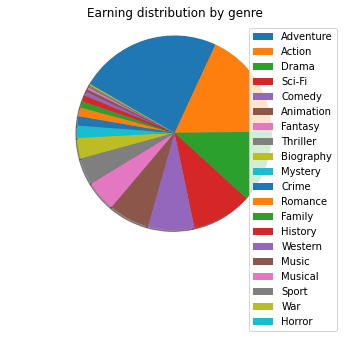

In [66]:
#plotting a pie chart
import matplotlib.pyplot as plt
patches,texts=plt.pie(res_df.Earning,counterclock=False,startangle=150,radius=1.5,shadow=True)
plt.title('Earning distribution by genre')
plt.legend(patches,labels=res_df.Genre,loc='best')
plt.axis('equal')
plt.show()

In [77]:
#ANS:
n=len(res_df)
for i in range(n):
    print(res_df.iloc[i,0],'%.2f'%res_df.iloc[i,2])

Adventure 23.57
Action 17.91
Drama 11.96
Sci-Fi 9.95
Comedy 7.69
Animation 6.77
Fantasy 5.15
Thriller 4.42
Biography 3.42
Mystery 2.01
Crime 1.55
Romance 1.45
Family 1.05
History 1.04
Western 0.65
Music 0.43
Musical 0.38
Sport 0.32
War 0.25
Horror 0.01


In [95]:
#ASS-8:Find the movie which has genre of 'Sci-fi' and 'Mystery' and has a rating >= 8.
db=sqlite3.connect("IMDB.sqlite")

In [96]:
imdb.head()

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


In [97]:
genre.head()

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama


In [98]:
df=pd.read_sql_query('''select imdb.movie_id,imdb.title,imdb.rating,genre.genre from imdb join genre on 
                        imdb.movie_id=genre.movie_id''',db)

In [99]:
df

,Movie_id,Title,Rating,genre
0,36809,12 Years a Slave (2013),8.1,Biography
1,36809,12 Years a Slave (2013),8.1,Drama
2,36809,12 Years a Slave (2013),8.1,History
3,30114,127 Hours (2010),7.6,Adventure
4,30114,127 Hours (2010),7.6,Biography
...,...,...,...,...
346,42294,X-Men: First Class (2011),7.8,Adventure
347,42294,X-Men: First Class (2011),7.8,Sci-Fi
348,32217,Zootopia (2016),8.1,Adventure
349,32217,Zootopia (2016),8.1,Animation


In [100]:
#Filtering dataframe
df=df[((df.genre=='Sci-Fi') | (df.genre=='Mystery')) & (df.Rating>=8)]

In [101]:
df

,Movie_id,Title,Rating,genre
19,31722,Arrival (2016),8.0,Mystery
20,31722,Arrival (2016),8.0,Sci-Fi
98,13277,Gone Girl (2014),8.1,Mystery
104,11289,Guardians of the Galaxy (2014),8.1,Sci-Fi
116,21768,Her (2013),8.0,Sci-Fi
137,46824,Inception (2010),8.8,Sci-Fi
143,46900,Interstellar (2014),8.6,Sci-Fi
167,36478,Mad Max: Fury Road (2015),8.1,Sci-Fi
200,37979,Prisoners (2013),8.1,Mystery
217,36011,Shutter Island (2010),8.1,Mystery


In [104]:
def FindMoviebyGenre(title,genre):
    n=len(title)
    d={}
    for i in range(n):
        if title[i] not in d:
            d[title[i]]=[genre[i]]
        else:
            d[title[i]].append(genre[i])
        if len(d[title[i]])==2:
            return title[i]

ans=FindMoviebyGenre(list(df.Title),list(df.genre))
print(ans)

Arrival (2016)
